# NNIA Assignment 3
**DEADLINE: 24.11.2023 0800 CET**
- Philipp Hawlitschek 7043167 (phha00002)
- William LaCroix 7038732 (wila00001)
- Hours of work per person: 3

# Submission Instructions
**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the submission deadline. All course-related questions can be addressed on the course **CMS Forum**.

* Assignments are to be submitted in a **team of 2-3**. It is fine to submit first **2** assignments without a team, but starting from the **3rd** assignment it is not allowed.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, and any necessary Python files. For this specific assignment, please, also include CSV file, generated by Pandas, and PNG picture from Matplotlib.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (`.zip` is the only accepted extension) in **CMS**.
* Only **one** member of the group should make the submission.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2(_Name3_id3).zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization repeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>


# 1 PCA (5p)

## 1.1 PCA Intuition (2p)

Carefully read this [blog post](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) by Zakaria Jaadi and answer the following questions about PCA
1. What is the motivation for using PCA? (0.25p)
2. What is a reconstruction error? (0.25p)
3. Why do we need to standardize the data when performing PCA? (0.25p)
4. How can we tell if one principal component accounts for more information than another? (0.25p)

Consider two datasets of children $D_1$ and $D_2$ which consist of vectors with the following features:

- $D_1$:
  - body weight
  - age (years)
  - age (months)

- $D_2$:
  - body weight
  - age (years)
  - hours sleeping

Assume real-life reasonable correlations between features. Answer the following questions and justify your answers mathematically:

5. Would $D_1$ look the same if you projected it using PCA into a 3-dimensional space? (0.5p)
6. What would be the difference in reconstruction error of a projection into 2-dimensional space of $D_1$ and $D_2$ (separatedy)? (0.5p)

#### Answers:
1. What is the motivation for using PCA? (0.25p):<br>
Datasets that contain a large number of features (or variables) have an equivalently high number of dimensions, so it's hard to visualize and work with the data. By using Principal Component Analysis, we can reduce the number of dimensions to simplify the data, so that it's easier to handle. Additionally, this makes the application of machine learning algorithms to the data easier and faster.
2. What is a reconstruction error? (0.25p):<br>
The reconstruction error is the information that is lost when the dimensionality of the data is reduced.
3. Why do we need to standardize the data when performing PCA? (0.25p):<br>
Since PCA is quite sensitive to the variance of the initial values, we need to transform them to the same order of magnitude to prevent biases after the dimensionality reduction has happened.
4. How can we tell if one principal component accounts for more information than another? (0.25p):<br>
After constructing the covariance matrix of the variables, we need to rank its eigenvectors by their eigenvalues. A higher eigenvalue means that the corresponding eigenvector captures more variance (information) of the data.
<br>
<br>
5. Would $D_1$ look the same if you projected it using PCA into a 3-dimensional space? (0.5p):<br>
No, $D_1$ would probably not look the same after projection into a 3-dimensional space. Even though the original dataset has 3 features and the output space also has 3 features, which might lead to the assumption that the structure would be preserved, the 2 features `age (years)` and `age (months)` are directly correlated. Therefore the eigenvectors of the covariance matrix (the principal components) would point into the same directions, resulting in something more like a 2D-plane (or a very flat rectangular cuboid) in 3D-space.
6. What would be the difference in reconstruction error of a projection into 2-dimensional space of 𝐷1 and 𝐷2 (separatedy)? (0.5p):<br>
As explained above in (5.), the features `age (years)` and `age (months)` are highly correlated in $D_1$, and therefore they have a high covariance, which later means that the reconstruction error of a projection into 2-dimensional space would be very low for $D_1$, since the eigenvectors of the covariance matrix (the principal components) for both features already pointed into the same direction, which translates to them containing roughly the same information. This is why not much information is lost upon "compression" and therefore the reconstruction error will be small.<br>
For $D_2$ the reconstruction error would be larger than for $D_1$, because all 3 features carry their own distinct information in this dataset, which means that there is some information lost upon compression.

## 1.2 PCA for visualization purposes (3 points)
In this exercise you will perform visulization of [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using PCA.
Write your code in the respective cells. Of course, you can add additional cells or change their order, but please don't significantly change the structure of the notebook. Use PyTorch tensors to perform all your calculations. For all questions that requires written answer, please write it in a markdown cell.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm
import torch
from torchvision.datasets import MNIST

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download the dataset and save it to a local folder. You should use the train set.
mnist_dataset = MNIST('data/', train=True, download=True)

mnist_X, mnist_Y = mnist_dataset.data, mnist_dataset.targets
print(mnist_X.shape)

X_flat = mnist_X.reshape(-1, 28*28).float()
print(X_flat.shape)

# We must make the data zero-centered before applying PCA
M = torch.mean(X_flat)
X_flat = X_flat - M

torch.Size([60000, 28, 28])
torch.Size([60000, 784])


### 1.2.1. Perform PCA on the input data (1.5 pts)
Calculate covariance matrix of the input data. Hint: You can use torch.matmul for matrix multiplication.

In [3]:
cov_matrix = torch.matmul(X_flat.t(), X_flat) / (X_flat.size(0) - 1) # (X_flat.size(0) - 1) means N-1
cov_matrix

tensor([[1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385],
        [1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385],
        [1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385],
        ...,
        [1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385],
        [1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385],
        [1110.1279, 1110.1279, 1110.1279,  ..., 1110.1385, 1110.1385,
         1110.1385]])

Perform eigendecomposion of the covariance matrix. Hint: you can use torch.linalg.eig.

In [4]:
# torch.linalg.eig returns a tuple with [0] being the eigenvalues and [1] the eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)
print(eigenvalues.size())
print(eigenvalues[:10])
print(eigenvectors.size())
print(eigenvectors[:10])

torch.Size([784])
tensor([1537738.2500+0.j,  312919.1562+0.j,  243270.0000+0.j,  210030.7188+0.j,
         180669.9531+0.j,  147851.8438+0.j,  124902.5469+0.j,   99676.5234+0.j,
          97663.5547+0.j,   81284.5781+0.j])
torch.Size([784, 784])
tensor([[-2.5672e-02+0.j,  5.7520e-03+0.j,  1.5941e-04+0.j,  ...,
         -3.2900e-04+0.j,  2.1308e-06+0.j,  2.0389e-06+0.j],
        [-2.5672e-02+0.j,  5.7521e-03+0.j,  1.5934e-04+0.j,  ...,
         -3.3496e-04+0.j, -3.9144e-06+0.j, -3.4398e-06+0.j],
        [-2.5672e-02+0.j,  5.7518e-03+0.j,  1.5932e-04+0.j,  ...,
         -2.9027e-04+0.j,  1.7109e-05+0.j,  1.6695e-05+0.j],
        ...,
        [-2.5672e-02+0.j,  5.7520e-03+0.j,  1.5934e-04+0.j,  ...,
         -2.3827e-04+0.j,  2.7932e-05+0.j,  2.5942e-05+0.j],
        [-2.5672e-02+0.j,  5.7520e-03+0.j,  1.5940e-04+0.j,  ...,
         -3.3097e-04+0.j,  3.8249e-06+0.j,  4.0387e-06+0.j],
        [-2.5672e-02+0.j,  5.7520e-03+0.j,  1.5981e-04+0.j,  ...,
         -3.6383e-04+0.j,  4.0848e-05+0.

### 1.2.2 Analyzing the results of PCA (1.5 pts)
Extract the first two principal components of the data, i.e. reduce the dimensionality of the dataset to 2. Plot the result. Different numbers must be represented as different colors on the scatter plot. You can use a randomly sampled portion of the data so that the plot doesn't get cluttered.
Describe whether it's possible to differentiate the numbers in 2 dimensions. Are there any additional observations?

## Answer:

As we can see in the plot below, there is significant overlap between all of the labels, which indicates that the first two components alone are not enough to differentiate between numbers. Additionally, the first two principal components show strong colinearity, suggesting that a simplified model (including other dimensions) may only need to include one or the other, and not necessarily both dimensions, to sufficiently distinguish digits.

C:\Users\William\AppData\Local\Temp\ipykernel_17720\2655697161.py:3: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:299.)
  X_projected = torch.matmul(X_flat, eigenvectors[:2].float().t()) # 60000x784 * 784x2


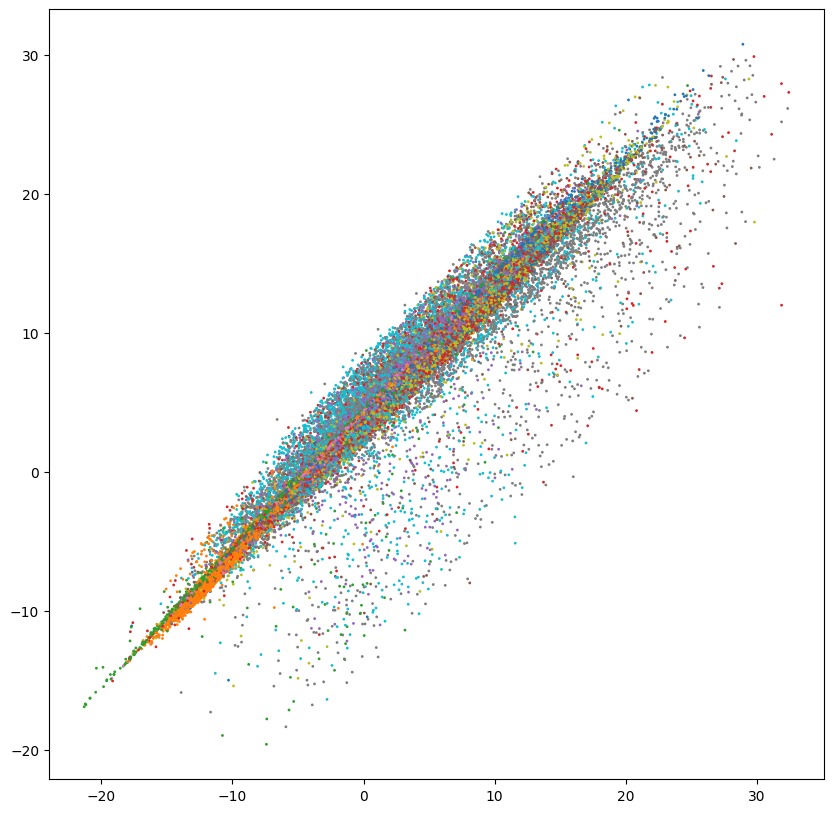

In [5]:
# the result of torch.linalg.eig is already sorted, so we take the first 2 elements.
# cast to float, because it originally was ComplexFloat
"""Runtime roughly 9s on my system"""
X_projected = torch.matmul(X_flat, eigenvectors[:2].float().t()) # 60000x784 * 784x2

PC1, PC2 = X_projected[:, 0], X_projected[:, 1] # X[n, x] = x, X[n, y] = y; for n in X[60000][PC1, PC2]

plt.figure(figsize=(10, 10))
plt.scatter(PC1, PC2, s=1, alpha=1, c=mnist_Y, cmap='tab10')
plt.show()

Plot the graph of cumulative explained variance vs number of components. You might also want to make an additional plot for the first N components. How many components should we use to describe the data? Motivate your answer.

In [6]:
# Apply PCA to full dataset
pca = PCA()
pca.fit(X_flat)

# Calculate cumulative explained variance
"""Runtime roughly 17s on my system"""
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Separate cells, cuz this one is slow, but plotting is fast

Dimensions explaining 95% of total variance: 154
Dimensions explaining 99% of total variance: 331


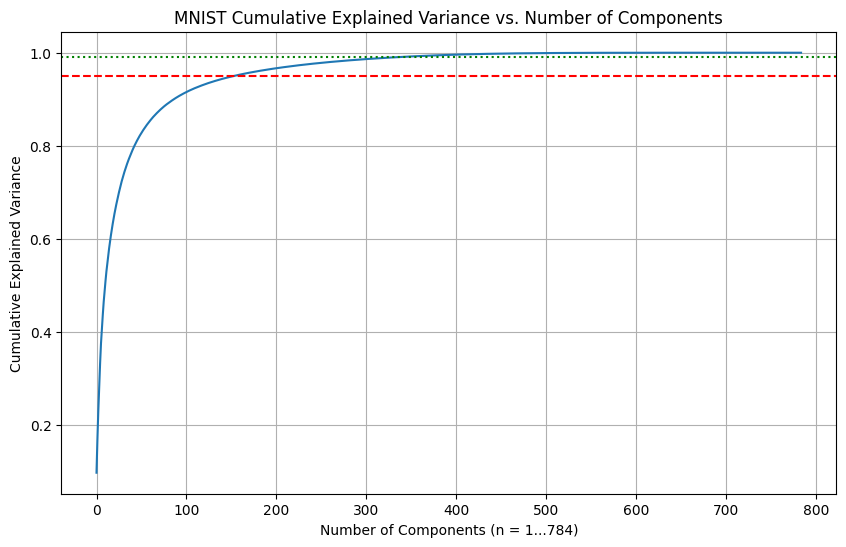

In [7]:
for i, variance in enumerate(cumulative_variance):
    if variance >= 0.95:
        print(r"Dimensions explaining 95% of total variance:", i+1)
        break
for i, variance in enumerate(cumulative_variance):
    if variance >= 0.99:
        print(r"Dimensions explaining 99% of total variance:", i+1)
        break

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.99, color='g', linestyle=':')
plt.title('MNIST Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components (n = 1...784)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Answer:

Common thresholds for feature selection based on total explained variance are 95% and 99% (corresponding to significance values p=0.05 and p=0.01). Based on these thresholds, we may want to select $D=154$ or $D=331$, respectively, depending on how accurate we need our model to be.

On the other hand, nearly 80% of the total variance is explained by the first $D=40$ components (shown more clearly below in first n=154 plot), so depending on our task, even a significantly reduced ($M=784\to D=40$) model can provide substantial explanatory power.

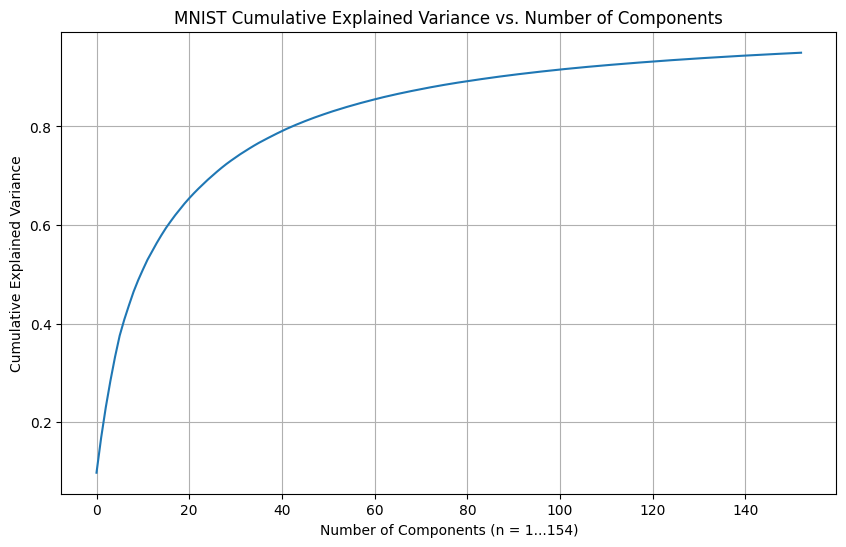

In [8]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance[:153])
# plt.axhline(y=0.95, color='r', linestyle='--')
# plt.axhline(y=0., color='g', linestyle=':')
plt.title('MNIST Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components (n = 1...154)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 2 Implementing Regression (5p)


In this exercise we will practice implementing regression on the Titanic dataset using the package `sklearn`. <br>
[Titanic dataset](https://www.kaggle.com/c/titanic) contains the data about passengers of the ship and information whether they survived or not. <br>
In the materials for this exercise you can find the file `titanic.csv`. This file contains preprocessed data with information about passenger ID, age, class, and price of their ticket.

**2.1 Load the data as a pandas dataframe, using [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method (0.5 points)**

In [9]:
# load the data into the variable `titanic`, have a look at the data

titanic = pd.read_csv("titanic.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,Price
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,18.728936
std,259.119524,0.491460,0.838250,14.526497,21.385514
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,7.824219
50%,445.000000,0.000000,2.000000,28.000000,9.839600
75%,677.750000,1.000000,3.000000,38.000000,26.000000
max,891.000000,1.000000,3.000000,80.000000,211.500000


**2.2 Here we will implement a simple linear regression and try to see if we can predict the *price* of the ticket based on the *age* of the passenger (0.5 points)** <br>
Consult the documentation on [LinearRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in `sklearn`

In [10]:
# 1) create an instance of LinearRegression class
# 2) fit the model to predict Price of the ticket from Age of the passenger
#    (consult the METHODS section in the documentation)
# Hint: it might be the case that you will have to reshape your data using .reshape(-1, 1).
#    You can create separate numpy arrays containing only Age and Price and reshape them if needed.

regressor = LR()
titanic_X = np.array(titanic["Age"]).reshape(-1, 1)
price = titanic["Price"].copy()

titanic_Y = titanic["Price"].copy()
regressor.fit(titanic_X, titanic_Y)

Y_hat = regressor.predict(titanic_X)


**What are the parameters of the model that we fit? Hint: the parameters are the attributes of the model, consult the documentation.**

#### Answer:

A linear regression constructs a line through the data, minimizing the residual sum of squares. The intercept is the point on the y-scale where the line has a value of 0 on the x-scale.
The slope is the amount of change on the y-value (Price) for a change of 1 on the x-scale (Age)

In [11]:
# Get the parameters of the model
intercept = regressor.intercept_
slope = regressor.coef_[0]

print("##########################\nThe paramters are:\n##########################\n")
print(f"Intercept: {intercept}\nSlope: {slope}")

##########################
The paramters are:
##########################

Intercept: 8.776410777436194
Slope: 0.3351118073656695


**2.3 Write the formula of the fitted regression. (0.5 points)**

#### Answer:

A line is defined by: $y = m * x + b$.<br>
$y$ refers to the predicted value.<br>
$m$ refers to the slope of the line.<br>
$x$ refers to the predictor.<br>
$b$ refers to the intercept.<br>

(Price) = (Slope) $*$ (Age) $+$ (Intercept)<br>
(Price in USD) = $0.3351118073656695$ $*$ (Age in  years) $+$ $8.776410777436194$


**2.4 Let us see how good are the estimated values of the model. (0.5 points)** <br>
Write the formula for Mean Squared Error and calculate the value for our age~price model. <br>
Check if you calculated it correctly using the [mean_squared_error method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) from `sklearn.metrics`

*Answer (MSE formula)*:

$$MSE = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat Y_i)^2$$

In [12]:
# a) calculate mean squared error of our model
# b) check you answer using mean_squared_error method.

squared_residuals = [(y - yhat)**2 for y, yhat in zip(titanic_Y, Y_hat)]
manual_MSE = sum(squared_residuals)/len(squared_residuals)
print(f"Our MSE is:\t{manual_MSE}")

sklearn_MSE = MSE(titanic_Y, Y_hat)
print(f"sklearn MSE is:\t{sklearn_MSE}")

Our MSE is:	433.03541836274667
sklearn MSE is:	433.0354183627467


**2.5 Get predictions of your model (hint: there is a corresponding method) and plot them with the original data on the same graph. (1 point)** <br>


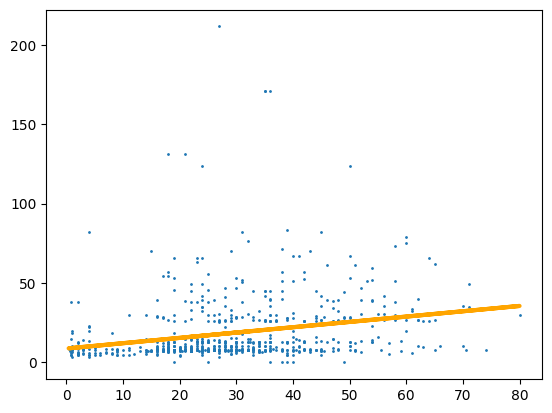

In [13]:
# Plot original data and predictions on the same graph

plt.scatter(titanic_X, titanic_Y, s=1)
plt.plot(titanic_X, Y_hat, c = "orange", linewidth = 3)

plt.show()

Is Age a good predictor for the Price of the ticket? Have a look at the data again. Is there a better predictor? <br>
**2.6 Choose another predictor and repeat the same steps (2.2-2.5). Report the better predictor. (0.5 points)**

##########################
The paramters are:
##########################

Intercept: 56.907847623773435
Slope: -17.069344435872583

Our MSE is:	252.25678322689757
sklearn MSE is:	252.25678322689726


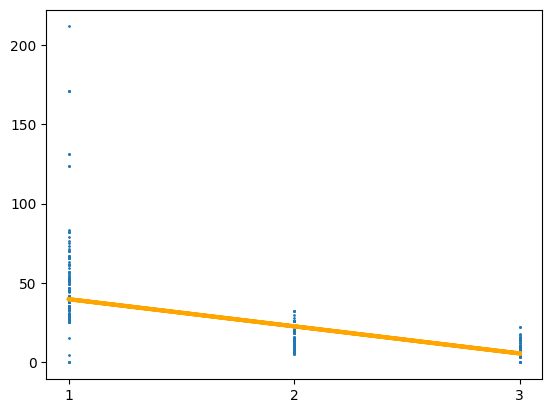

In [16]:
# TODO: Choose another predictor and repeat the same steps

regressor2 = LR()
X2 = np.array(titanic["Pclass"]).reshape(-1, 1)

regressor2.fit(X2, titanic_Y)

Y_hat2 = regressor2.predict(X2)

intercept2 = regressor2.intercept_
slope2 = regressor2.coef_[0]

print("##########################\nThe paramters are:\n##########################\n")
print(f"Intercept: {intercept2}\nSlope: {slope2}\n")

squared_residuals2 = [(y - yhat)**2 for y, yhat in zip(titanic_Y, Y_hat2)]
manual_MSE2 = sum(squared_residuals2)/len(squared_residuals2)
print(f"Our MSE is:\t{manual_MSE2}")

sklearn_MSE2 = MSE(titanic_Y, Y_hat2)
print(f"sklearn MSE is:\t{sklearn_MSE2}")

plt.scatter(X2, titanic_Y, s=1)
plt.plot(X2, Y_hat2, c = "orange", linewidth = 3)
plt.xticks([1, 2, 3])
plt.show()

#### Answer:

We chose the predictor `Pclass`, which we assumed to have a better correlation with the response variable `Price`.
The linear regression (using residual sum of squares) yields an intercept of $56.90784762377343$ with a slope of $-17.06934443587258$. The MSE this time is $252.25678322689726$, which is $\approx41.7\%$ lower than in the original experiment. The following cell tests whether this improvement is significant for 'Pclass', when compared with the other predictors.

In [17]:


X_train = titanic[['PassengerId', 'Survived', 'Pclass', 'Age']].copy()
Y_train = titanic["Price"].copy()

titanic_X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, titanic_X2)
est2 = est.fit()

print("Looking at p-values for the different predictors, we find that only 'Pclass' is significant to p < 0.001.\n\n")

print(est2.summary())

Looking at p-values for the different predictors, we find that only 'Pclass' is significant to p < 0.001.


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.66e-90
Time:                        19:12:08   Log-Likelihood:                -2986.1
No. Observations:                 714   AIC:                             5982.
Df Residuals:                     709   BIC:                             6005.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------

The task aims to deepen your understanding of PCA.

**2.7: Carefully read Section 12.1.1 [PCA - Maximum variance formulation](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf#page=581) of the PRML book by Bishop. (1.5 points)**<br>
Write a concise summary of the section. Discuss how the definition of PCA given in the book is different from and related to the definition given in the lecture, minimum-error formulation, or the autoencoder perspective.

## Answer:

In general, PCA projects data from $D$ down to $M$ dimensions. 

Bishop's Maximum variance formulation uses the covariance matrix to find the $M$ eigenvectors with the largest eigenvalues. This corresponds to the maximum variance, which is the maximum "information" we can glean from a given dimension. 

In contrast, the minimum-error formulation compares the true values against those obtained by a lower-dimensional projection via $x_n=\sum_{i=1}^D(x^T_nu_i)u_i$, and attempts to find the parameters which minimize the MSE over the entire dataset for a given $D<M$.

The autoencoder perspective borrows from both of these ideas, where the encoder is essentially a linear layer with the principal componenets as weights taking dimension from $D\to M$ (maximum-variance), a single (hidden) layer which is the projection of $D$ onto $M$, and the decoder layer which takes the data back from $M\to D$ (minimum-error)